
--- Dataset Comparison Metrics ---
Dataset                    Initial Phase (SMS)  Updated Phase (Telegram)  \
Total Samples                      5749.000000              20104.000000   
Legit (Ham) Count                  4828.000000              14291.000000   
Phishing (Spam) Count               921.000000               5813.000000   
Avg Word Count                       16.232562                 56.145991   
Max Word Count                      190.000000                251.000000   
Vocab Size (Unique Words)          9109.000000              52418.000000   

Dataset                     Final Phase  
Total Samples              20297.000000  
Legit (Ham) Count          14319.000000  
Phishing (Spam) Count       5978.000000  
Avg Word Count                57.002611  
Max Word Count               206.000000  
Vocab Size (Unique Words)  65398.000000  


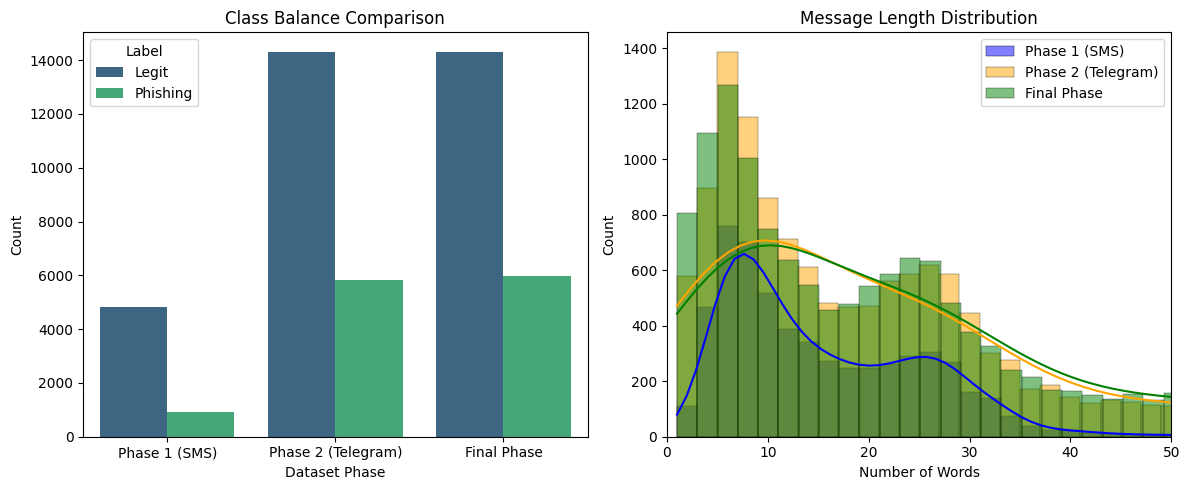


✅ Comparison chart saved as 'Dataset_Comparison_Analysis.png'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Datasets
# Replace with your actual file names
df_initial = pd.read_csv(r"Initial_Stuff\03_Cleaned_Initial_Dataset.csv")
df_updated = pd.read_csv(r"Updated_Phase\03_Cleaned_Updated_Dataset.csv")
df_final = pd.read_csv(r"Final_Bot\03_Cleaned_Final_Dataset.csv")
# 2. Calculate Basic Stats
def get_stats(df, name):
    df['text_length'] = df['cleaned_text'].astype(str).apply(len)
    df['word_count'] = df['cleaned_text'].astype(str).apply(lambda x: len(x.split()))
    
    return {
        "Dataset": name,
        "Total Samples": len(df),
        "Legit (Ham) Count": len(df[df['label_encoded'] == 0]),
        "Phishing (Spam) Count": len(df[df['label_encoded'] == 1]),
        "Avg Word Count": df['word_count'].mean(),
        "Max Word Count": df['word_count'].max(),
        "Vocab Size (Unique Words)": len(set(" ".join(df['cleaned_text'].astype(str)).split()))
    }

stats_1 = get_stats(df_initial, "Initial Phase (SMS)")
stats_2 = get_stats(df_updated, "Updated Phase (Telegram)")
stats_3 = get_stats(df_final, "Final Phase")

# 3. Print Comparison Table
comparison_df = pd.DataFrame([stats_1, stats_2, stats_3])
print("\n--- Dataset Comparison Metrics ---")
print(comparison_df.set_index("Dataset").T)

# 4. Generate Comparative Charts
plt.figure(figsize=(12, 5))

# Chart 1: Class Distribution (Balance)
plt.subplot(1, 2, 1)
data_combined = pd.concat([
    df_initial.assign(Phase='Phase 1 (SMS)'),
    df_updated.assign(Phase='Phase 2 (Telegram)'),
    df_final.assign(Phase='Final Phase')
])
sns.countplot(data=data_combined, x='Phase', hue='label_encoded', palette='viridis')
plt.title("Class Balance Comparison")
plt.xlabel("Dataset Phase")
plt.ylabel("Count")
plt.legend(title='Label', labels=['Legit', 'Phishing'])

# Chart 2: Word Count Distribution (Complexity)
plt.subplot(1, 2, 2)
sns.histplot(df_initial['word_count'], color='blue', label='Phase 1 (SMS)', kde=True, alpha=0.5, binwidth=2)
sns.histplot(df_updated['word_count'], color='orange', label='Phase 2 (Telegram)', kde=True, alpha=0.5, binwidth=2)
sns.histplot(df_final['word_count'], color='green', label='Final Phase', kde=True, alpha=0.5, binwidth=2)
plt.title("Message Length Distribution")
plt.xlabel("Number of Words")
plt.xlim(0, 50)
plt.legend()

plt.tight_layout()
plt.savefig('Dataset_Comparison_Analysis.png', dpi=300)
plt.show()

print("\n✅ Comparison chart saved as 'Dataset_Comparison_Analysis.png'")